In [2]:
import pandas as pd
import missingno as miss
import matplotlib.pyplot as plt

# Analyse de données relatives à la plateforme Parcoursup

## I) Introduction

**1) Description et origne des datasets.**

Tout d'abord qu'est ce que **Parcoursup** ?

Parcoursup est la plateforme **nationale** de préinscription en première année de l’enseignement supérieur en France. \
Cette dernière permet aux étudiants (de nationalité française et résidant en France ou non) entrant ou se réorientant en première année d'études supérieures de formuler leurs voeux pour différentes formations offertes par les établissements d'enseignement supérieur français du monde entier. \
Cela en passant par l'intermédiaire d'une plateforme Web: **https://www.parcoursup.gouv.fr/**

Cette plateforme appartenant au gouvernement français et les démarches s'effectuant exclusivement en ligne, il a été possible pour ce dernier de récolter de nombreuses données quant à Parcoursup. Celles-ci sont ainsi mises à disposition librement par le gouvernement sur le site open data du **ministère de l'enseignement supérieur et de la recherche:** \
**https://data.enseignementsup-recherche.gouv.fr/pages/explorer/?sort=modified&refine.keyword=parcoursup** *(1)*

Parmis ces datasets nous en exploiterons principalement deux types: 
1. **Les Voeux de poursuite d'études et de réorientation dans l'enseignement supérieur et réponses des établissements** pour les années allant de 2018 à 2023 tout deux inclus:  **https://github.com/Clwrnd/DataAnalyticsProject/tree/main/DataSet_Voeux_RepEtablissement**
2. **Les propositions d'admission dans l'enseignement supérieur des élèves de terminale diplômés du baccalauréat général selon leurs enseignements de spécialité** pour les années 2021 et 2022: **https://github.com/Clwrnd/DataAnalyticsProject/tree/main/DataSet_VoeuxParSpe**

On trouvera ci-joint les documents et liens utiles à la compréhension et lecture des différents datasets:

1. Pour le premier type, on pourra se référer au lien *(1)* en choisissant l'année souhaitée et en se rendant dans la rubrique "information". On a de plus pour chaque année une méthodologie détaillé ici: **https://github.com/Clwrnd/DataAnalyticsProject/tree/main/DataSet_Voeux_RepEtablissement/Methodologie**
2. Pour le deuxième type: **https://data.enseignementsup-recherche.gouv.fr/explore/dataset/fr-esr-parcoursup-enseignements-de-specialite-bacheliers-generaux-2/information/**.  Et pour une méthodologie plus détaillé: **https://github.com/Clwrnd/DataAnalyticsProject/blob/main/DataSet_VoeuxParSpe/m%C3%A9thodo_OD_EDS_21_22.pdf**

**2) Informations notables sur les datasets**

Ici sont évoquées les informations notables des documents et liens précédents qui pourront éventuellement être nécéssaires à une bonne analyse des données. En gardant à l'esprit qu'il soit possible que cette liste ne soit pas exhaustive et qu'au besoin il faudra se réferer aux documents précédents. \
Pour le **premier type** de datasets, on peut relever comme informations importantes:

1. **Aucun** de ces datasets ne prend en compte les formation en **apprentissage**. Il sera ainsi donc impossible de tirer quelconque conclusion à ce propos.
2. Pour l'année 2018, le terme "endo-recrutement (CPGE,BTS)" fait référence au libélé: "Le nombre de candidats admis en BTS ou en CPGE et issus de leur lycée" pour les années suivantes et pour le nom de colonne correspondante de la même année. Ce libélé explicitant le précédent.
3. Tout les établissements d'enseignement supérieur français n'effectue pas leurs recrutements sur Parcoursup. Ces derniers pouvant être plus ou moins nombreux selon le domaine. Il est important de garder cela à l'esprit avant d'effectuer quelconque conclusion.
4. Certains voeux se composent de sous-voeux représentant une formation dans un établissement précis. (Exemple: Voeux -> INSA, Sous-voeux -> INSA Strasbourg).
5. La somme des admis par phase peut être inférieur au total du nombre d’admis à cause des candidats admis hors phases.
6. En 2020, ont été ajouté les données cartographiques et deux nouveaux indicateurs *(voir document méthodologie 2020)*.
7. En 2021, la mention "très bien" a été détaillé grâce à "avec/sans félicitation du jury". D'autres changements ont aussi été effectué sur les groupes d'appelés *(voir document méthodologie 2021)*.
8. Les deux indicateurs ajoutés en 2020 ne prennent en compte uniquement que les étudiants scolarisés en France ou de nationalité européenne. De plus, le mode de calcul de ces indicateurs diffèrent entre 2020/2021 et 2022/2023. Il est spécifié qu'il est **impossible** de recalculer ces indicateurs avec les données open data.

Pour le **deuxième type** de dataset: 

1. Les enseignements "Arts" et "Littérature" se décline en plusieurs sous-enseignements plus spécifique.
2. La somme des candidats ayant confirmé un voeu dans chaque formation ne correspond pas au total des candidats car un candidat est donc compté autant de fois qu'il a fait de voeux dans des formations différentes. De même pour les propositions d'admissions. En revanche, les candidats ne peuvent accepter qu'une seule proposition d'admission. Donc dans la colonne "Nb de candidats bacheliers ayant accepté une proposition d'admission", on peut faire la somme des candidats pour chaque formation.

**3) Objectifs**

Les points et objectifs précis seront précsiés tout au long de l'avancement de l'analyse mais on peut cependant déjà donner un point de vue global de ces derniers:

1. Vérification de faits dont la véracité à déjà été prouvée ou dont la véracité est considérée à juste titre comme logique et naturelle
2. Tentatives d'extraction de lien de corrélation dans le but d'essayer de tirer de nouvelles conclusions
3. Tentative de mise au point d'un modèle prédictif permettant de donner les chances d'acceptations dans une certaine formation en fonction de différents facteurs.

## II) Analyse

**1) Préliminaires: Nettoyage des données et analyse explorative**

In [3]:
# Création de tous les DatasFrames
'''#Type 1:
dvre2023_df = pd.read_csv("DataSet_Voeux_RepEtablissement/fr-esr-parcoursup_2023.csv",encoding="utf8",sep=";")
dvre2022_df = pd.read_csv("DataSet_Voeux_RepEtablissement/fr-esr-parcoursup_2022.csv",encoding="utf8",sep=";")
dvre2021_df = pd.read_csv("DataSet_Voeux_RepEtablissement/fr-esr-parcoursup_2021.csv",encoding="utf8",sep=";")
dvre2020_df = pd.read_csv("DataSet_Voeux_RepEtablissement/fr-esr-parcoursup_2020.csv",encoding="utf8",sep=";")
dvre2019_df = pd.read_csv("DataSet_Voeux_RepEtablissement/fr-esr-parcoursup_2019.csv",encoding="utf8",sep=";")
dvre2018_df = pd.read_csv("DataSet_Voeux_RepEtablissement/fr-esr-parcoursup_2018.csv",encoding="utf8",sep=";")


#Type 2:
dvps_df = pd.read_csv("DataSet_VoeuxParSpe/fr-esr-parcoursup-enseignements-de-specialite-bacheliers-generaux-2.csv",encoding="utf8",sep=";")'''

dvre2023_df = pd.read_csv(r"C:\Cours INSA\GE-2\S4\Python\projet\DataAnalyticsProject\DataSet_Voeux_RepEtablissement\fr-esr-parcoursup_2023.csv", encoding="utf8", sep=";")
dvre2022_df = pd.read_csv(r"C:\Cours INSA\GE-2\S4\Python\projet\DataAnalyticsProject\DataSet_Voeux_RepEtablissement\fr-esr-parcoursup_2022.csv", encoding="utf8", sep=";")
dvre2021_df = pd.read_csv(r"C:\Cours INSA\GE-2\S4\Python\projet\DataAnalyticsProject\DataSet_Voeux_RepEtablissement\fr-esr-parcoursup_2021.csv", encoding="utf8", sep=";")
dvre2020_df = pd.read_csv(r"C:\Cours INSA\GE-2\S4\Python\projet\DataAnalyticsProject\DataSet_Voeux_RepEtablissement\fr-esr-parcoursup_2020.csv", sep=";")
dvre2019_df = pd.read_csv(r"C:\Cours INSA\GE-2\S4\Python\projet\DataAnalyticsProject\DataSet_Voeux_RepEtablissement\fr-esr-parcoursup_2019.csv", sep=";")
dvre2018_df = pd.read_csv(r"C:\Cours INSA\GE-2\S4\Python\projet\DataAnalyticsProject\DataSet_Voeux_RepEtablissement\fr-esr-parcoursup_2018.csv", encoding="utf8", sep=";")

dvps_df = pd.read_csv(r"DataSet_VoeuxParSpe\fr-esr-parcoursup-enseignements-de-specialite-bacheliers-generaux-2.csv", encoding="utf8", sep=";")


**a)** Commençons par éxaminer les éventuelles différences au niveau de la structure des dataframes de type 1.

In [4]:
#Nombre de colonnes dans les différents datasets
print (len(dvre2023_df.columns),len(dvre2022_df.columns),len(dvre2021_df.columns),  
       len(dvre2020_df.columns),len(dvre2019_df.columns),len(dvre2018_df.columns))

118 118 118 115 92 85


In [5]:
#Différences au niveau des libéllés de colonnes les années 2023,2022,2021
print ( set(dvre2023_df.columns) ^ set(dvre2022_df.columns) )
print ( set (dvre2022_df.columns) ^ set(dvre2021_df.columns) )

set()
{'Part des terminales générales qui étaient en position de recevoir une proposition en phase principale', 'Part des terminales professionnelles qui étaient en position de recevoir une proposition en phase principale', 'Taux d’accès', 'Part des terminales technologiques qui étaient en position de recevoir une proposition en phase principale', 'Dont taux d’accès des candidats ayant un bac professionnel ayant postulé à la formation', 'cod_aff_form', 'Taux d’accès des candidats ayant postulé à la formation (ratio entre le dernier appelé et le nombre vœux PP)', 'Dont taux d’accès des candidats ayant un bac général ayant postulé à la formation', 'Dont taux d’accès des candidats ayant un bac technologique ayant postulé à la formation', 'COD_AFF_FORM'}


On constate que pour ces années on a exactement la même structure, entre 2022 et 2021 seuls les noms des colonnes diffèrent mais elles représentent cependant les **mêmes données** (en gardant en tête les remarques faites au sujet de ces indicateurs dans le point I.2). On peut ainsi renommer les colonnes de l'années 2021 pour faciliter l'analyse.

In [6]:
dvre2021_df = dvre2021_df.rename(columns={'Dont taux d’accès des candidats ayant un bac professionnel ayant postulé à la formation': 
                                          'Part des terminales professionnelles qui étaient en position de recevoir une proposition en phase principale'
                                          ,'Dont taux d’accès des candidats ayant un bac technologique ayant postulé à la formation':
                                          'Part des terminales technologiques qui étaient en position de recevoir une proposition en phase principale',
                                         'Dont taux d’accès des candidats ayant un bac général ayant postulé à la formation':
                                          'Part des terminales générales qui étaient en position de recevoir une proposition en phase principale',
                                          'COD_AFF_FORM':'cod_aff_form',
                                     'Taux d’accès des candidats ayant postulé à la formation (ratio entre le dernier appelé et le nombre vœux PP)':
                                         'Taux d’accès'                                       
                                         })

De plus, on peut maintenant effectuer une jointure de ces trois dataframes étant donné leur structure identique. Cela rendra l'analyse plus aisée et moins chargée.

In [7]:
dvre2023_22_21_df= pd.concat([dvre2023_df,dvre2022_df,dvre2021_df])

Examinons maintant les colonnes manquantes des autres années:

In [8]:
print( set(dvre2021_df.columns) - set(dvre2020_df.columns) )
print( set(dvre2020_df.columns) - set(dvre2019_df.columns) )
print( set(dvre2019_df.columns) - set(dvre2018_df.columns) )

{'etablissement_id_paysage', 'cod_aff_form', 'list_com', 'composante_id_paysage', "Concours communs et banque d'épreuves", 'Filière de formation détaillée bis', '% d’admis néo bacheliers avec mention Très Bien avec félicitations au bac', 'Commune de l’établissement', 'Filière de formation.1', 'Dont % d’admis avec mention (BG)', 'Part des terminales technologiques qui étaient en position de recevoir une proposition en phase principale', 'Dont effectif des admis néo bacheliers avec mention Très Bien avec félicitations au bac', 'Dont % d’admis avec mention (BP)', 'Part des terminales générales qui étaient en position de recevoir une proposition en phase principale', 'Dont % d’admis avec mention (BT)', 'Taux d’accès', 'Part des terminales professionnelles qui étaient en position de recevoir une proposition en phase principale'}
{'Regroupement 3 effectué par les formations pour les classements', 'Rang du dernier appelé du groupe 2', 'Rang du dernier appelé du groupe 4', 'Dont taux d’accès d

On remarque que certains indicateurs manquants sont ceux mentionnés en introduction (cela est donc cohérent), d'autres sont des affinages de certains indicateurs. Au vu de leurs grandes similarités structurelles, il n'est pas insensée de vouloir et de pouvoir effectuer des comparaisons et analyses communes entres ces datasets. Il faudra cependant prendre ces différences de structure en compte lors de l'analyse. 

**Cette première phase préliminaire nous permet de voir quelles indicateurs pourront être examinés sur quelles périodes de temps.**

En ce qui concerne les types de donnés en présence, on pourra se référer aux documents méthodologiques de l'introduction. 

**b)** Examinons maintenant les données un peu plus en détails et essayont de faire un "tri" parmis ces-dernirèes.

In [9]:
#Aperçu des colonnes (Type 1)
#On affiche uniquement les colonnes du dataframes de 2023 car ce-dernier est le plus complets et reprend les colonnes des précédents
dvre2023_df.columns.to_list()

['Session',
 'Statut de l’établissement de la filière de formation (public, privé…)',
 "Code UAI de l'établissement",
 'Établissement',
 'Code départemental de l’établissement',
 'Département de l’établissement',
 'Région de l’établissement',
 'Académie de l’établissement',
 'Commune de l’établissement',
 'Filière de formation',
 'Sélectivité',
 'Filière de formation très agrégée',
 'Filière de formation détaillée',
 'Filière de formation.1',
 'Filière de formation détaillée bis',
 'Filière de formation très détaillée',
 'Coordonnées GPS de la formation',
 'Capacité de l’établissement par formation',
 'Effectif total des candidats pour une formation',
 'Dont effectif des candidates pour une formation',
 'Effectif total des candidats en phase principale',
 'Dont effectif des candidats ayant postulé en internat',
 'Effectif des candidats néo bacheliers généraux en phase principale',
 'Dont effectif des candidats boursiers néo bacheliers généraux en phase principale',
 'Effectif des candi

In [10]:
#Aperçu des colonnes (Type 2)
dvps_df.columns.to_list()

['Année du Baccalauréat',
 'Enseignements de spécialité',
 'Formation',
 'Nombre de candidats bacheliers ayant confirmé au moins un vœu',
 "Nombre de candidats bacheliers ayant reçu au moins une proposition d'admission",
 "Nombre de candidats bacheliers ayant accepté une proposition d'admission"]

Observons maintenant si certaines variables contiennent un nombre élevé de valeur nulle.

**Type 1**

In [11]:
#From "main_study"
def perc_null (df): 
    return(df.isnull().sum() * 100 / len(df)).round(2)

In [12]:
nullpercl = perc_null(dvre2023_22_21_df)
with pd.option_context('display.max_rows', None): 
    display(nullpercl)

Session                                                                                                                                              0.00
Statut de l’établissement de la filière de formation (public, privé…)                                                                                0.00
Code UAI de l'établissement                                                                                                                          0.00
Établissement                                                                                                                                        0.00
Code départemental de l’établissement                                                                                                                0.00
Département de l’établissement                                                                                                                       0.00
Région de l’établissement                                                   

In [13]:
nullpercl = perc_null(dvre2020_df)
with pd.option_context('display.max_rows', None): 
    display(nullpercl)

Session                                                                                                                                              0.00
Statut de l’établissement de la filière de formation (public, privé…)                                                                                0.00
Code UAI de l'établissement                                                                                                                          0.00
Établissement                                                                                                                                        0.00
Code départemental de l’établissement                                                                                                                0.00
Département de l’établissement                                                                                                                       0.00
Région de l’établissement                                                   

In [14]:
nullpercl = perc_null(dvre2019_df)
with pd.option_context('display.max_rows', None): 
    display(nullpercl)

Session                                                                                                      0.00
Statut de l’établissement de la filière de formation (public, privé…)                                        0.00
Code UAI de l'établissement                                                                                  0.00
Établissement                                                                                                0.00
Code départemental de l’établissement                                                                        0.00
Département de l’établissement                                                                               0.00
Région de l’établissement                                                                                    0.00
Académie de l’établissement                                                                                  0.00
Filière de formation très agrégée                                                       

In [15]:
nullpercl = perc_null(dvre2018_df)
with pd.option_context('display.max_rows', None): 
    display(nullpercl)

Session                                                                                               0.00
Code UAI de l'établissement                                                                           0.00
Établissement                                                                                         0.00
Code départemental de l’établissement                                                                 0.00
Département de l’établissement                                                                        0.00
Région de l’établissement                                                                             0.00
Académie de l’établissement                                                                           0.00
Filière de formation très agrégée                                                                     0.00
Filière de formation                                                                                  0.00
Concours communs et banques d'épreuve

On constate que la majorité des indicateurs contenat des valeurs nulles se réfèrent soit à des données géographique (id_paysage...), soit à des données relatives aux internat (CPGE, BTS), ou soit à des données concernant les groupes 2, 3, 4 et 5. \
En ce qui concerne ce type données géographique manquantes, ces dernières ne nous intéressent pas. On pourra donc les évincer. \
En ce qui concernent les groupes autres que le premier, ces valeurs nulles s'expliquent par le fait que toutes les formations ne passent pas nécéssairement par ces phases. Ces dernières étant d'autant moins nombreux que l'on avancent dans ces phases. Ainsi, ces données ne perdent pas de leur signifiance, au contraire. On les gardera donc. \
Enfin en ce qui concernent les données relatives aux CPGE, BTS et au internats, ce manque de données s'expliquent par le fait qu'elles sont spécifique à certaines formations. Ainsi, on les gardera aussi. *(Voir cellule suivante pour des explications)*.

In [16]:
# Etudes des valeurs nulles pour une formation spécifique, les CPGE.
CPGE="CPGE"
with pd.option_context('display.max_rows', None): 
    display(perc_null(dvre2023_22_21_df.query(" `Filière de formation très agrégée` == @CPGE ")))

Session                                                                                                                                               0.00
Statut de l’établissement de la filière de formation (public, privé…)                                                                                 0.00
Code UAI de l'établissement                                                                                                                           0.00
Établissement                                                                                                                                         0.00
Code départemental de l’établissement                                                                                                                 0.00
Département de l’établissement                                                                                                                        0.00
Région de l’établissement                                             

On constate que pour ce type de formation en particulier, les indicateurs relatifs au internats et (CPGE, BTS) ont **significativement** moins de valeurs nulle, d'où le choix précédent. Ce phénomène s'observe aussi sur d'autres formation (BTS par exemple) et pour d'autres indicateurs 
 (banque d'épreuves par exemple).

In [17]:
#Suppression des colonnes non significantes.
dvre2023_22_21_df=dvre2023_22_21_df.drop(columns=["composante_id_paysage", "etablissement_id_paysage"],errors ="ignore")
#Supression de la mémoire des dataframes qui seront inutilisés
del (dvre2023_df,dvre2022_df,dvre2021_df)

**Type 2**

In [18]:
nullpercl = perc_null(dvps_df)
display(nullpercl)

Année du Baccalauréat                                                             0.0
Enseignements de spécialité                                                       0.0
Formation                                                                         0.0
Nombre de candidats bacheliers ayant confirmé au moins un vœu                     0.0
Nombre de candidats bacheliers ayant reçu au moins une proposition d'admission    0.0
Nombre de candidats bacheliers ayant accepté une proposition d'admission          0.0
dtype: float64

Il n'y a pour ce dataset rien à effectuer.

Au vu de l'analyse déjà faite, la visualisation des valeurs nulles à partir d'une heatmap et d'une matrice de nullité nous a semblé dispensable après les avoir effectué. C'est pour cela que nous ne les avons pas affiché par soucis de surcharge du document à la lecture. *(Le code est tout de même ci-dessous)*

**2) Analyse réelle**

## Modèle prédictif

### 1. Préparation des données pour le modèle

In [29]:
import numpy as np

# Calcul du taux de remplissage
dvre2023_22_21_df['taux_remplissage'] = dvre2023_22_21_df['Effectif total des candidats ayant accepté la proposition de l’établissement (admis)'] / dvre2023_22_21_df['Capacité de l’établissement par formation']

# Création de la colonne cible pour la classification binaire
dvre2023_22_21_df['cible'] = np.where(dvre2023_22_21_df['taux_remplissage'] >= 1, 1, 0)

# Sélection des colonnes pour les features (suppression des colonnes non nécessaires)
X = dvre2023_22_21_df.drop(columns=['cible', 'taux_remplissage', 'Effectif total des candidats ayant accepté la proposition de l’établissement (admis)'])
y = dvre2023_22_21_df['cible']


### 2. Séparation des données

In [31]:
from sklearn.model_selection import train_test_split

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Prétraitement des données

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Identification des colonnes numériques et catégorielles
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Création des pipelines pour les transformations numériques et catégorielles
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinaison des transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Application du préprocesseur
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### 4. Création et entrainement

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Création du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
model.fit(X_train_processed, y_train)


RandomForestClassifier(random_state=42)

### 5. Evaluation du modèle

In [35]:
from sklearn.metrics import accuracy_score, classification_report

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test_processed)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8198484478122708
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      5970
           1       0.76      0.49      0.59      2212

    accuracy                           0.82      8182
   macro avg       0.80      0.72      0.74      8182
weighted avg       0.81      0.82      0.81      8182



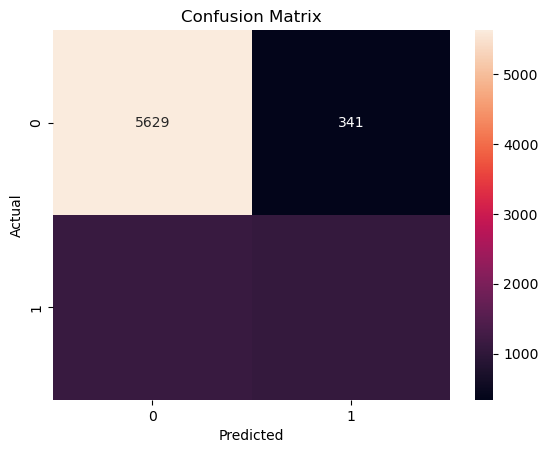

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


#!!! A revoir